<h1><center> Customer Prediction </center></h1>

## Objectives

__This project is a course project from IBM Data Science. The dataset is copied from that course.__ 

In this project, __Logistic Regression__ is used. It is a variation of Linear Regression, used when the observed dependent variables are categorical. It produces a formula that predict the probability of the class label as a function of the independent variabels. A model is created for a telecommunication company to predict when its customers will leave for a competitor. 
  
In this project, a telecommunication company is concerned about the number of customers leaving their land-line business for cable competitors. A model is developed to understand who is leaving. An organization of this project is:

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>
            <a>Download Data</a>
        </li>
     </ul>
    <ul>
        <li>
            <a>Data Wrangling</a>
            <ul>
                <li>Deal wiht Missing Data</li>
                <li>Correct Data Format</li>
            </ul>
        </li>
     </ul>
     <ul>
        <li>
            <a>Data Exploratory</a>
            <ul>
                <li>Describe</li>
                <li>Visualization</li>
            </ul>
        </li>
    </ul>
    <ul>
        <li>
            <a>Model Development</a>
            <ul>
                <li>Pre-processing</li>
                <li>Logistic Regression</li>
            </ul>
        </li>
    </ul>
</div>

<hr>

We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and we may uncover insights we can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 

This data set provides information to predict what behavior will help to retain customers. We can analyze all relevant customer data and develop focused customer retention programs.

The dataset includes information about:

*   Customers who left within the last month – the column is called Churn
*   Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
*   Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
*   Demographic info about customers – gender, age range, and if they have partners and dependents


In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 1. Download Data

In [2]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv'

In [3]:
#download the data
customer_data = pd.read_csv(file_name)

In [4]:
# size of data 
NR = np.size(customer_data,0)
NC = np.size(customer_data,1)
print('There are ', NR, ' samples of data and ', NC, ' properties')

There are  200  samples of data and  28  properties


In [5]:
#display the first 10 rows of data
customer_data.head(10)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
5,68.0,52.0,17.0,120.0,1.0,24.0,0.0,1.0,0.0,20.70,...,0.0,0.0,0.0,0.0,0.0,3.030,3.240,4.787,1.0,0.0
6,42.0,40.0,7.0,37.0,2.0,8.0,1.0,1.0,1.0,8.25,...,0.0,1.0,1.0,1.0,1.0,2.110,3.157,3.611,4.0,0.0
7,9.0,21.0,1.0,17.0,2.0,2.0,0.0,0.0,0.0,2.90,...,0.0,0.0,0.0,0.0,0.0,1.065,3.240,2.833,1.0,0.0
8,35.0,50.0,26.0,140.0,2.0,21.0,0.0,1.0,0.0,6.50,...,0.0,0.0,1.0,1.0,0.0,1.872,3.314,4.942,3.0,0.0
9,49.0,51.0,27.0,63.0,4.0,19.0,0.0,1.0,0.0,12.85,...,0.0,1.0,1.0,0.0,1.0,2.553,3.248,4.143,2.0,0.0


There are 28 columns in this dataset. 

## 2. Data Wrangling

In [6]:
#Evaluating the missing data
missing_data = customer_data.isnull()
missing_data.head(10)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


"True" measn the data is missing. From the first 10 rows, there are no missing data. 

In [7]:
#Here use info() to count non-null values or missing values in each column
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

Nice, data look all clean. 

Data types look all correct. 

## 3. Exploratory Data Analysis

Data Exploratory or data analysis is requried to find the features or characteristics of the data.

In [8]:
customer_data.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,...,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,...,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,...,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


In [9]:
customer_data['churn'].value_counts()

churn
0.0    142
1.0     58
Name: count, dtype: int64

In [10]:
customer_data.groupby('churn').mean()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat
churn,,,,,,,,,,,,,,,,,,,,,
0.0,40.704225,43.563380,13.338028,82.563380,2.647887,12.15493,0.338028,0.795775,0.239437,13.629930,...,0.253521,0.239437,0.359155,0.471831,0.485915,0.359155,2.350331,3.241754,4.007366,2.464789
1.0,22.775862,35.293103,7.517241,56.931034,3.258621,5.50000,0.637931,0.482759,0.413793,7.282759,...,0.396552,0.362069,0.637931,0.413793,0.396552,0.637931,1.808793,3.198414,3.813052,2.500000


In [11]:
column_name = customer_data.columns

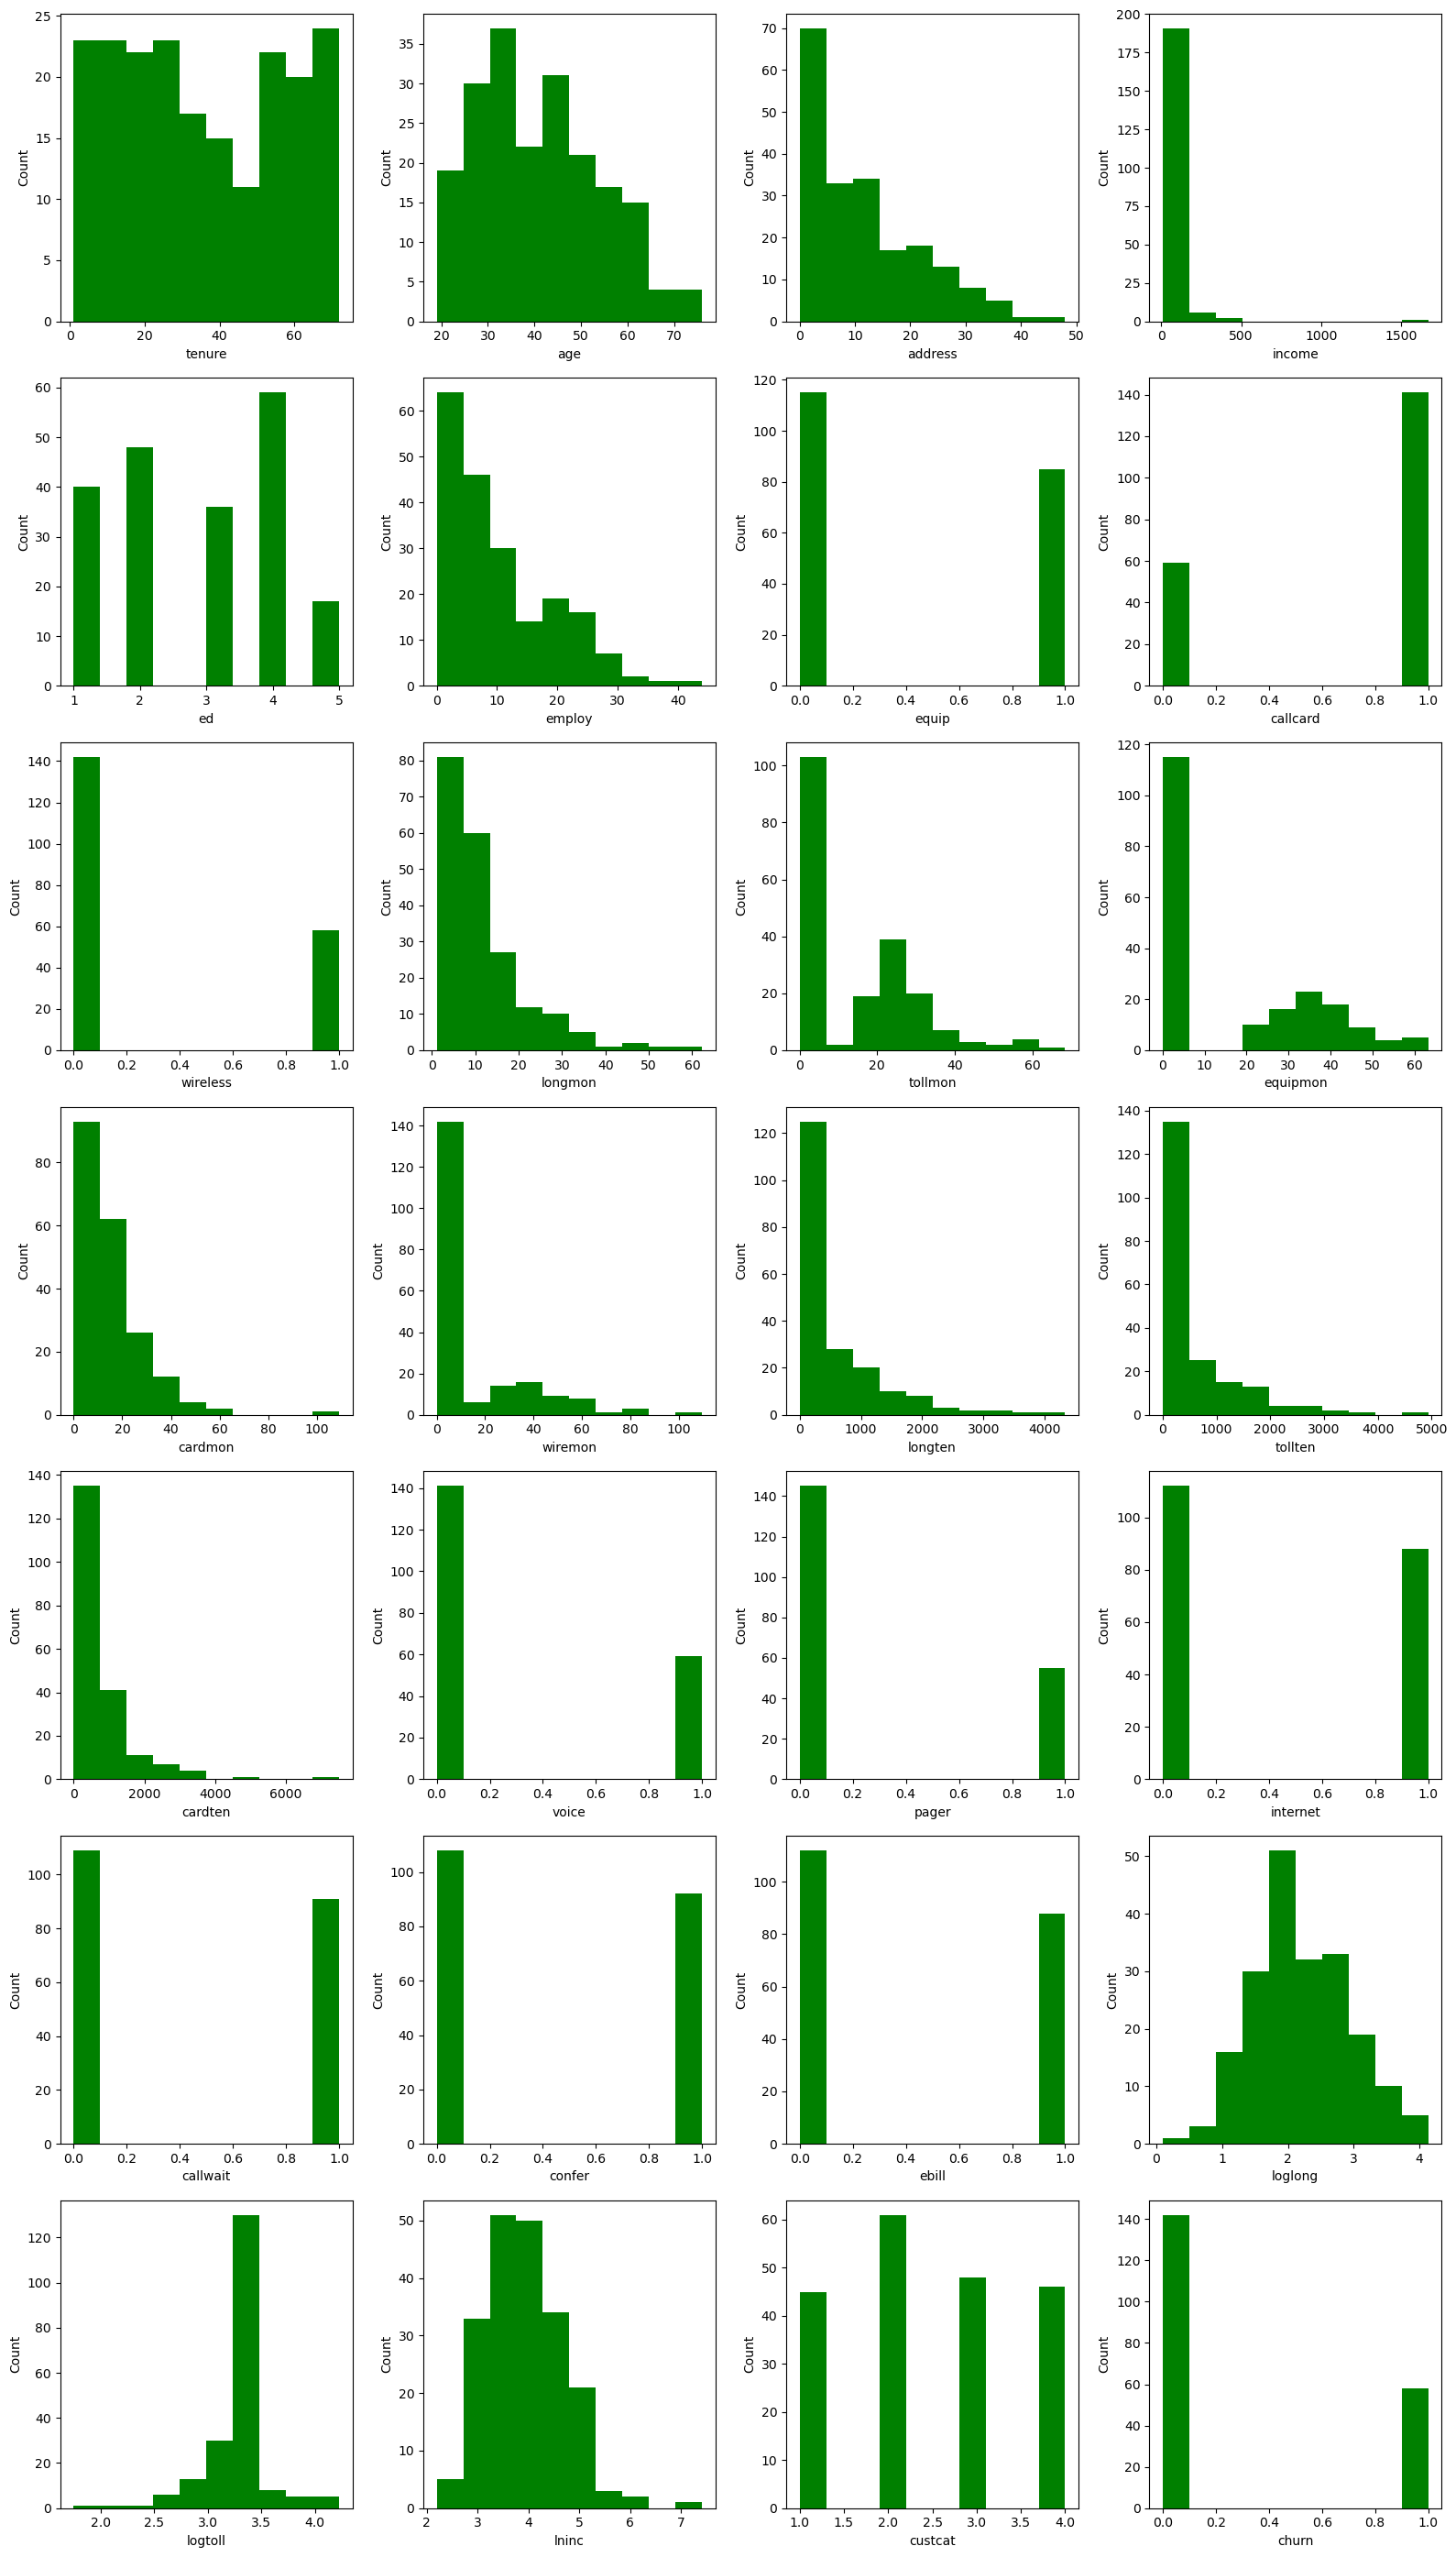

In [12]:
NR = 7
NC =4
plt.figure(figsize=(16,28))
C = 1
for col in column_name:
    plt.subplot(NR,NC,C)
    plt.hist(customer_data[col], histtype='bar', facecolor='g')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.ylim(0,)
    plt.tight_layout()
    C = C +1

### 4. Model Development

In this section, a Logistic Regression model is developed to predict who will leave the service.

#### 4.0 Data Preprocessing

Data preprocessing such as scaling/normalization is typically useful for linear models to accelerate the training convergence

In [13]:
X = customer_data[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']]

Y = customer_data['churn'].astype('int')

In [14]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)

#### 4.1 Logistic Regression (Linear)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [17]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)

In [18]:
yhat = LR.predict(x_test)

In [19]:
yhat_prob = LR.predict_proba(x_test)

In [20]:
from sklearn import metrics
print("Test set Jaccard Score: ", metrics.jaccard_score(y_test, yhat, pos_label=0))

Test set Jaccard Score:  0.7058823529411765


In [21]:
softmax_prediction=np.argmax(yhat_prob,axis=1)

In [22]:
print("Test set Accuracy: ", metrics.accuracy_score(y_test, softmax_prediction))

Test set Accuracy:  0.75


In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


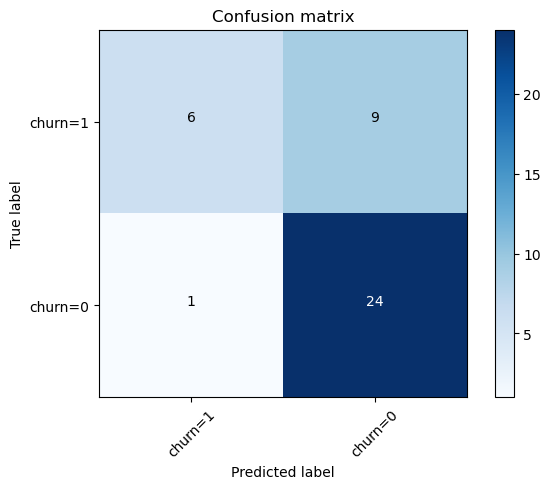

In [24]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [25]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



#### 4.2 Logistic Regression (SAG)

In [26]:
LR = LogisticRegression(C=0.01, solver='sag').fit(x_train,y_train)
yhat = LR.predict(x_test)
yhat_prob = LR.predict_proba(x_test)

In [27]:
print("Test set Jaccard Score: ", metrics.jaccard_score(y_test, yhat, pos_label=0))
softmax_prediction=np.argmax(yhat_prob,axis=1)
print("Test set Accuracy: ", metrics.accuracy_score(y_test, softmax_prediction))

Test set Jaccard Score:  0.625
Test set Accuracy:  0.625


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


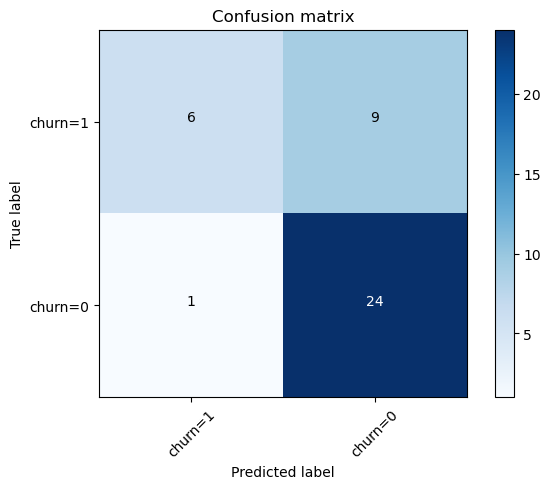

In [28]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [29]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77        25
           1       0.00      0.00      0.00        15

    accuracy                           0.62        40
   macro avg       0.31      0.50      0.38        40
weighted avg       0.39      0.62      0.48        40



Linear Logistic Regression is little better than the SAG, but they all below 80%. 